In [18]:
from math import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.interpolate import lagrange

## Рефернсное значение
посчитаем интеграл 

In [15]:
INT = 1.75585

def calculate_f(x, n=102):
    ans = 0
    for i in range(3, n):
        ans += 1 / (i ** 2 - i - x)
    return ans

Подсчет ряда возьмем из предыдущего дз, как и оценку  на число членов

In [40]:
N = 1000001

def calculate_nth_term(n, z):
    return 1.0 / (n ** 2 - n - z)

def calculate_f(z):
    part_sum = 0
    for i in range(3, N):
        part_sum += calculate_nth_term(i, z)
    return part_sum

## Формула трапеций

In [41]:

def calculate_int_tr(u):
    X = np.linspace(0, 3, num = u)
    ans = 0 
    for i in range(0, len(X) - 1):
        ans += (calculate_f(X[i]) + calculate_f(X[i + 1])) * (X[i + 1] - X[i]) / 2
    return ans

In [47]:
calculate_int_tr(10)

1.7566830588890234

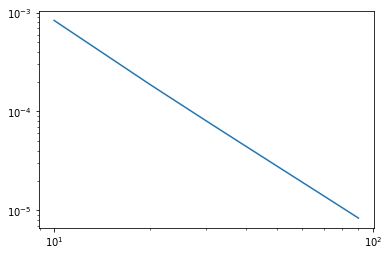

In [58]:
interval = np.arange(10, 100, 10)
plt.loglog(interval, [abs(calculate_int_tr(i) - INT) for i in interval])
plt.show()

## Формула Симпсона

In [52]:
def calculate_int_sm(u):
    
    X = np.linspace(0, 3, num = u - 1)
    
    ans = 0
    for i in range(0, len(X) - 1, 2):
        ans += calculate_f(X[i - 1]) + 4 * calculate_f(X[i]) + calculate_f(X[i + 1])
    return ans / (u - 1)

In [53]:
calculate_int_sm(10)

1.5204292867152054

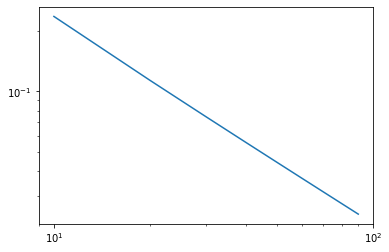

In [57]:
interval = np.arange(10, 100, 10)
plt.loglog(interval, [abs(calculate_int_sm(i) - INT) for i in interval])
plt.show()

Из графиков видно, что реальная погрешность ведет себя так же как и теоретическая